<a href="https://colab.research.google.com/github/harshydv36/house-price-prediction/blob/main/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('/content/Housing.csv')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['price'].value_counts()

,count
price,
4200000,17
3500000,17
4900000,12
5250000,9
5600000,9
...,...
2135000,1
1960000,1
1855000,1


In [ ]:
df['price'].describe()

,price
count,5.450000e+02
mean,4.766729e+06
std,1.870440e+06
min,1.750000e+06
25%,3.430000e+06
50%,4.340000e+06
75%,5.740000e+06
max,1.330000e+07


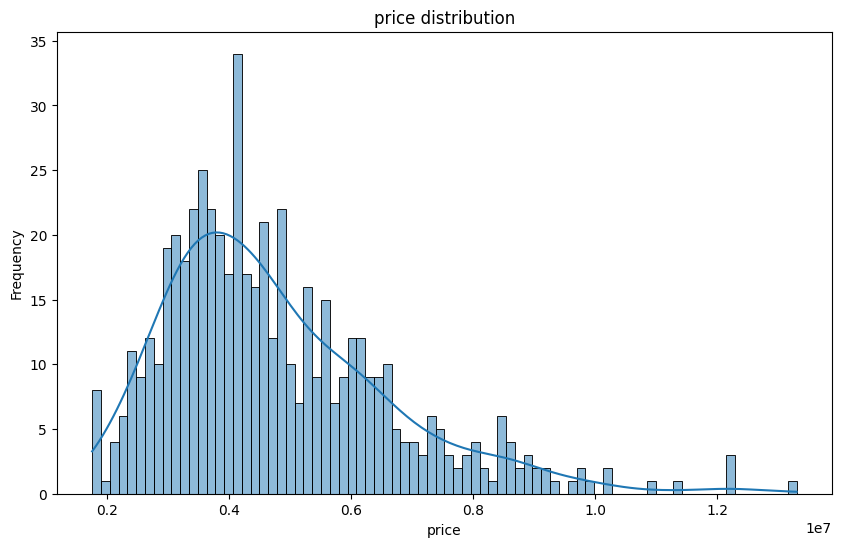

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=80, kde=True)
plt.title("price distribution")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df['area'].value_counts()

,count
area,
6000,24
3000,14
4500,13
4000,11
6600,9
...,...
3360,1
1700,1
3649,1


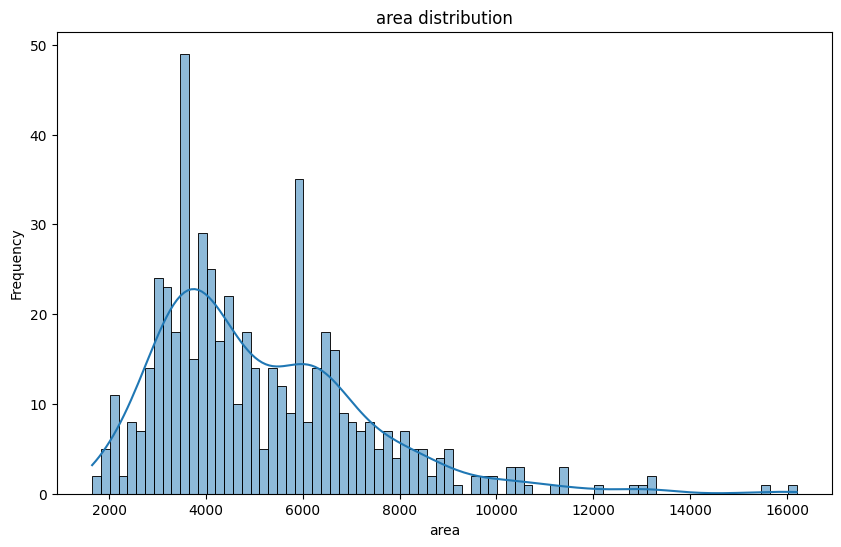

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['area'],bins=80, kde=True)
plt.title("area distribution")
plt.xlabel("area")
plt.ylabel("Frequency")
plt.show()

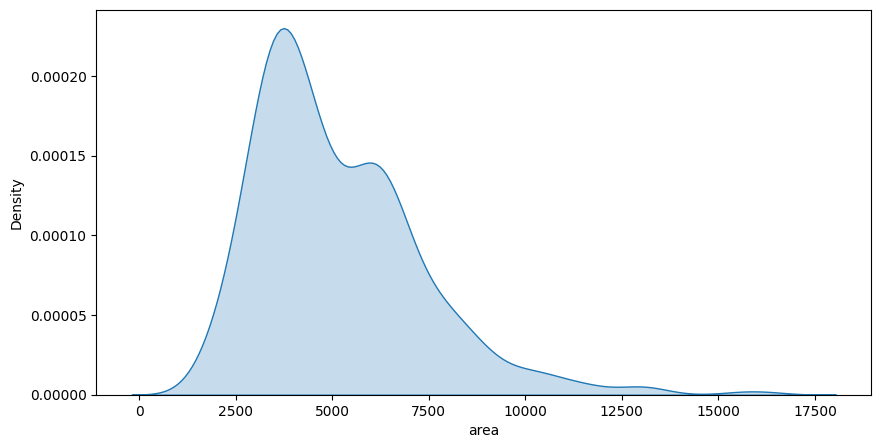

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['area'],fill=True)
plt.show()

In [ ]:
df['bedrooms'].value_counts()

,count
bedrooms,
3,300
2,136
4,95
5,10
6,2
1,2


/tmp/ipython-input-24-2957067388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['bedrooms'].value_counts().index,


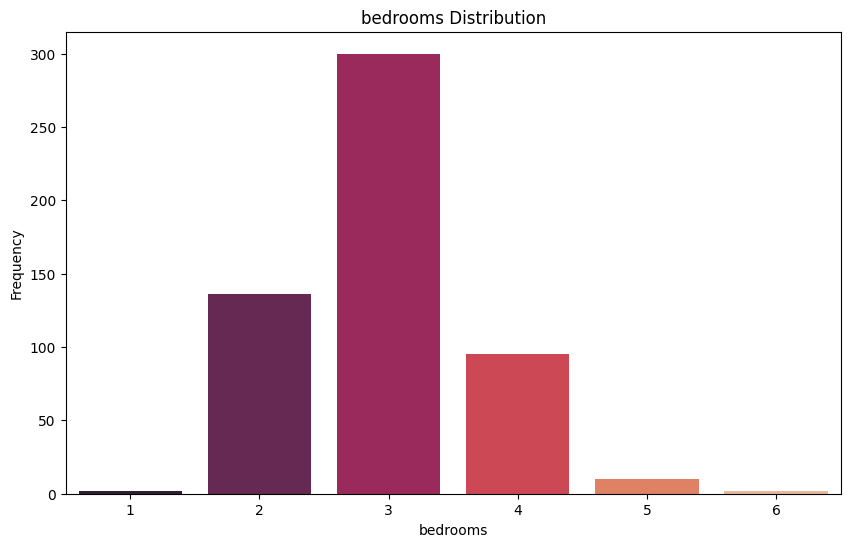

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['bedrooms'].value_counts().index,
y=df['bedrooms'].value_counts().values,
palette=sns.color_palette("rocket"))
plt.title('bedrooms Distribution')
plt.xlabel('bedrooms')
plt.ylabel('Frequency')
plt.show()

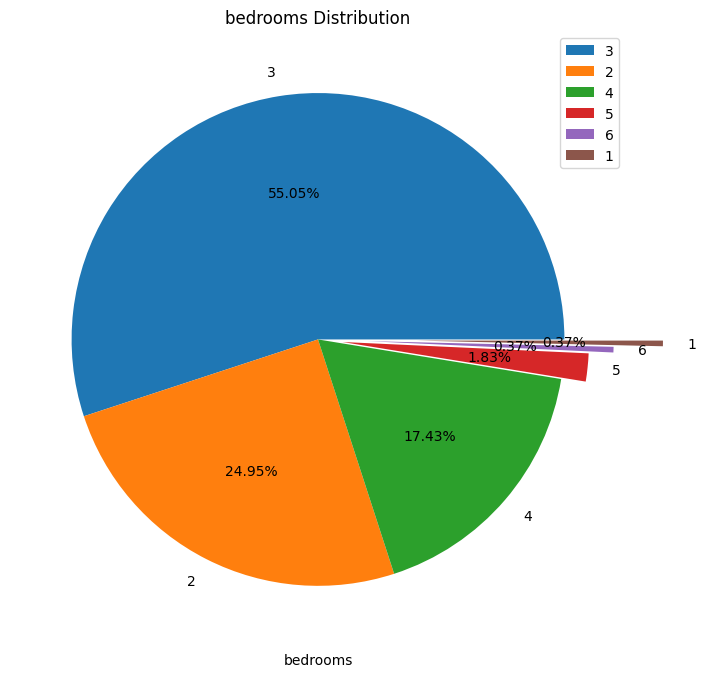

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df['bedrooms'].value_counts(),
        explode=[0,0,0,0.1,0.2,0.4],
        labels=df['bedrooms'].value_counts().index,
        shadow=False, autopct="%1.2f%%")
plt.title('bedrooms Distribution')
plt.xlabel('bedrooms')
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv('/content/Housing.csv')
df['bathrooms'].value_counts()

,count
bathrooms,
1,401
2,133
3,10
4,1


/tmp/ipython-input-27-145506218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['bathrooms'].value_counts().index,
/tmp/ipython-input-27-145506218.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot( x=df['bathrooms'].value_counts().index,


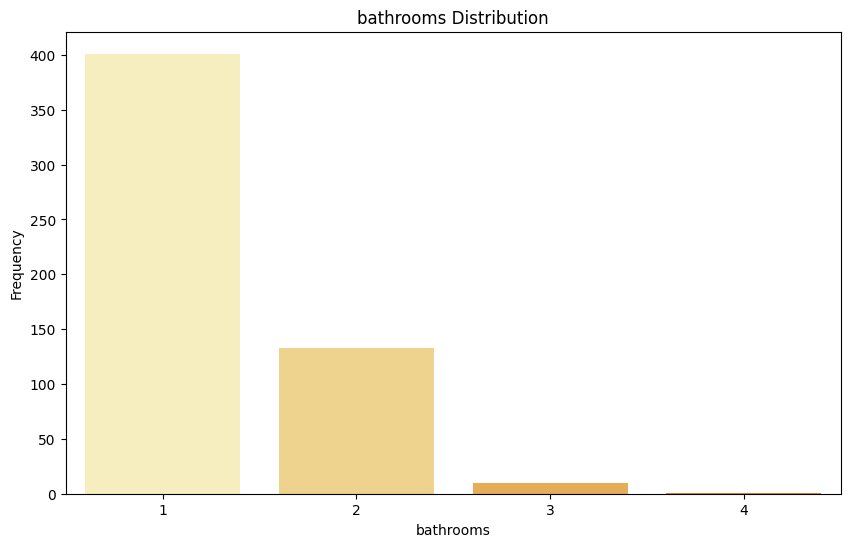

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['bathrooms'].value_counts().index,
y=df['bathrooms'].value_counts().values,
palette=sns.color_palette("YlOrBr"))
plt.title('bathrooms Distribution')
plt.xlabel('bathrooms')
plt.ylabel('Frequency')
plt.show()

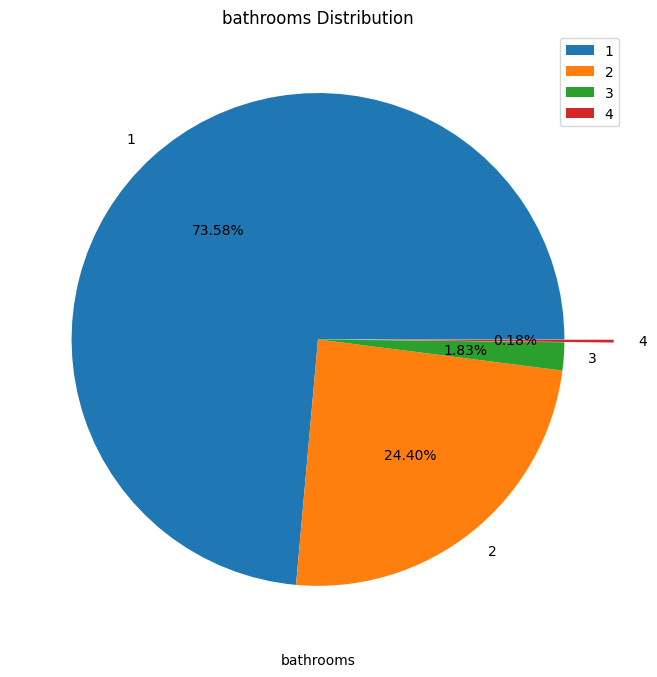

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df['bathrooms'].value_counts(),
        explode=[0,0,0,0.2],
        labels=df['bathrooms'].value_counts().index,
        shadow=False, autopct="%1.2f%%")
plt.title('bathrooms Distribution')
plt.xlabel('bathrooms')
plt.legend()
plt.show()

In [ ]:
df['stories'].value_counts()

,count
stories,
2,238
1,227
4,41
3,39


/tmp/ipython-input-31-1701638518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['stories'].value_counts().index,
/tmp/ipython-input-31-1701638518.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot( x=df['stories'].value_counts().index,


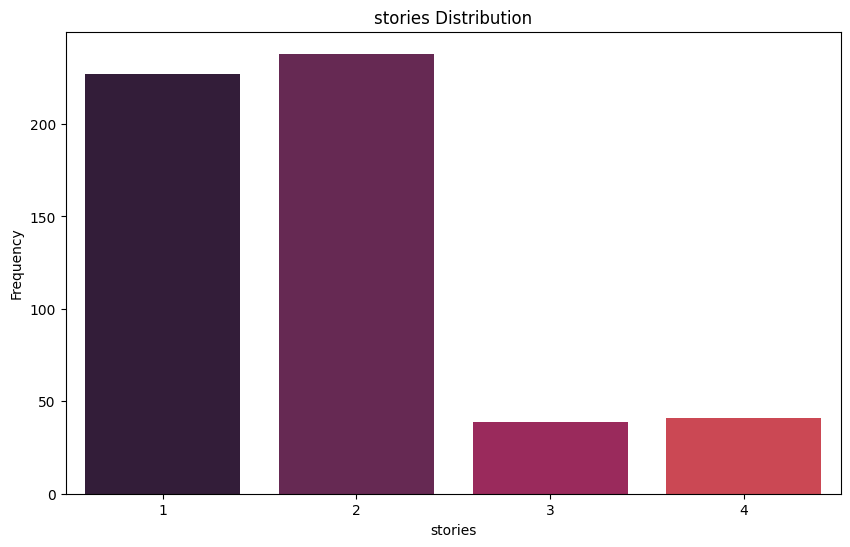

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['stories'].value_counts().index,
y=df['stories'].value_counts().values,
palette=sns.color_palette("rocket"))
plt.title('stories Distribution')
plt.xlabel('stories')
plt.ylabel('Frequency')
plt.show()

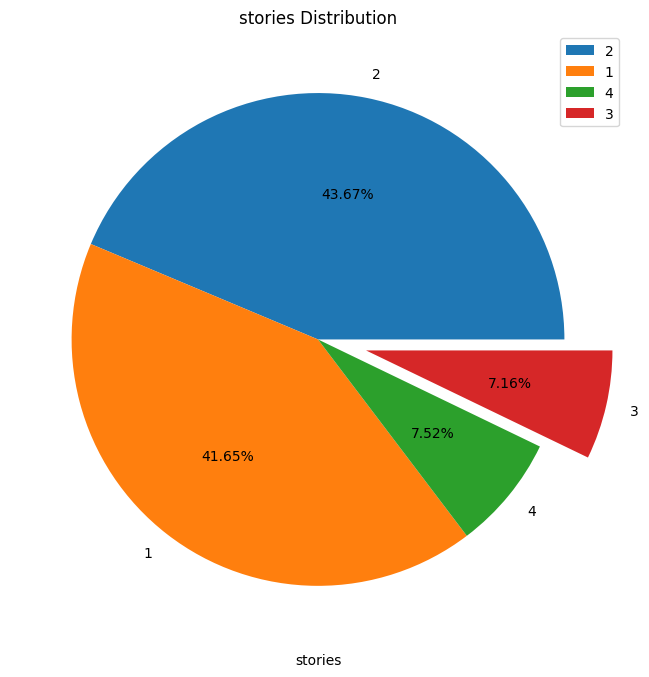

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df['stories'].value_counts(),
        explode=[0,0,0,0.2],
        labels=df['stories'].value_counts().index,
        shadow=False, autopct="%1.2f%%")
plt.title('stories Distribution')
plt.xlabel('stories')
plt.legend()
plt.show()

In [ ]:
df['parking'].value_counts()

,count
parking,
0,299
1,126
2,108
3,12


/tmp/ipython-input-34-3631844692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['parking'].value_counts().index,
/tmp/ipython-input-34-3631844692.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot( x=df['parking'].value_counts().index,


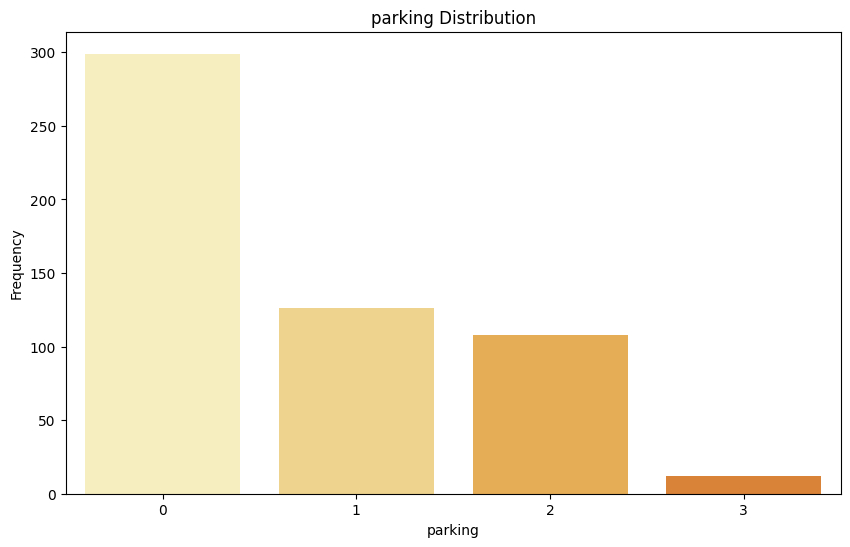

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['parking'].value_counts().index,
y=df['parking'].value_counts().values,
palette=sns.color_palette("YlOrBr"))
plt.title('parking Distribution')
plt.xlabel('parking')
plt.ylabel('Frequency')
plt.show()

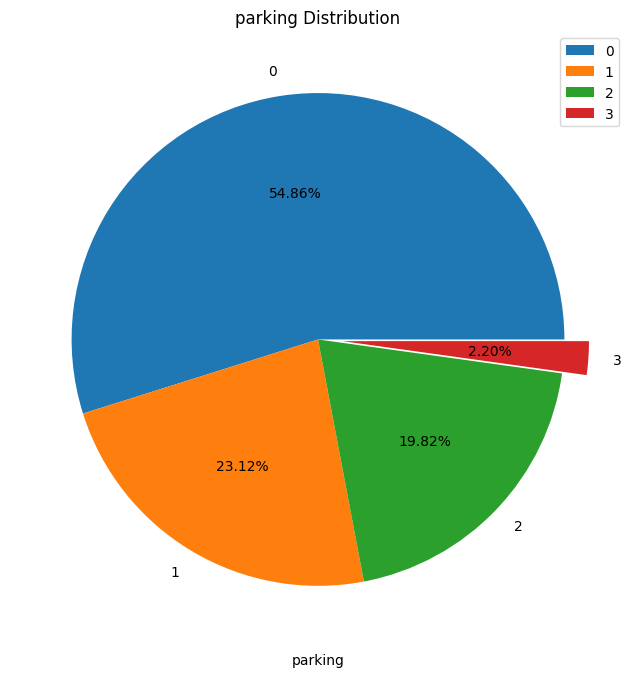

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df['parking'].value_counts(),
        explode=[0,0,0,0.1],
        labels=df['parking'].value_counts().index,
        shadow=False, autopct="%1.2f%%")
plt.title('parking Distribution')
plt.xlabel('parking')
plt.legend()
plt.show()

In [ ]:
df['prefarea'].value_counts()

,count
prefarea,
no,417
yes,128


/tmp/ipython-input-37-1923811132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['prefarea'].value_counts().index,
/tmp/ipython-input-37-1923811132.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot( x=df['prefarea'].value_counts().index,


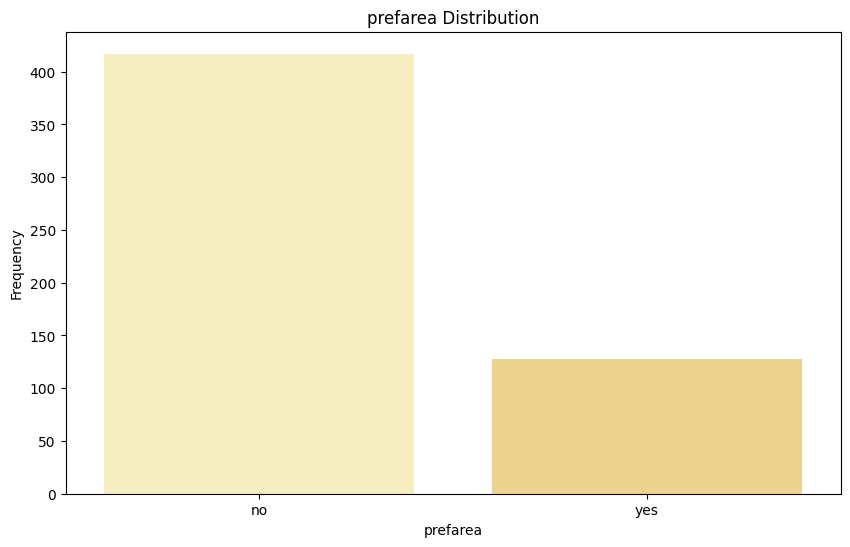

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['prefarea'].value_counts().index,
y=df['prefarea'].value_counts().values,
palette=sns.color_palette("YlOrBr"))
plt.title('prefarea Distribution')
plt.xlabel('prefarea')
plt.ylabel('Frequency')
plt.show()

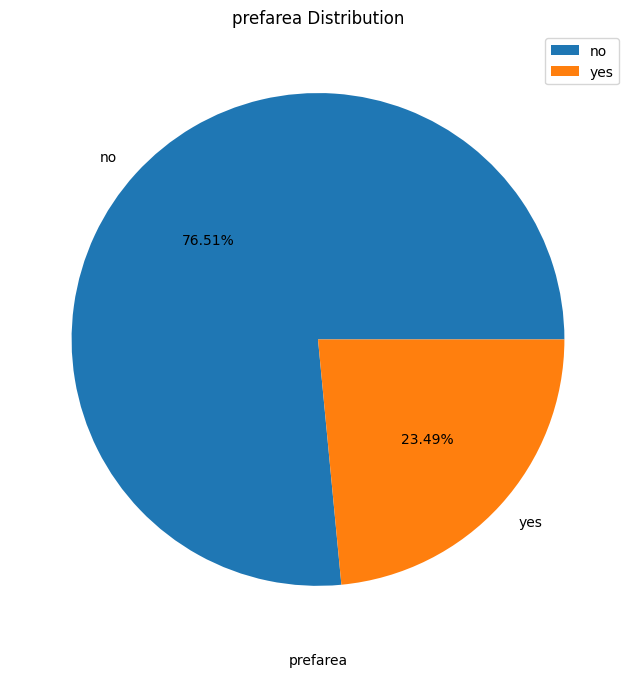

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df['prefarea'].value_counts(),
        explode=[0,0],
        labels=df['prefarea'].value_counts().index,
        shadow=False, autopct="%1.2f%%")
plt.title('prefarea Distribution')
plt.xlabel('prefarea')
plt.legend()
plt.show()

In [ ]:
df['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


/tmp/ipython-input-41-3162981388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['furnishingstatus'].value_counts().index,
/tmp/ipython-input-41-3162981388.py:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot( x=df['furnishingstatus'].value_counts().index,


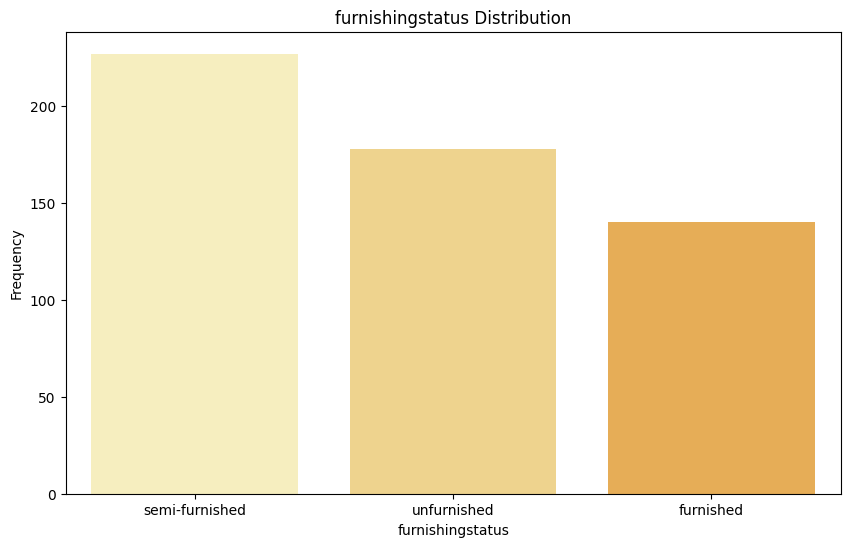

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['furnishingstatus'].value_counts().index,
y=df['furnishingstatus'].value_counts().values,
palette=sns.color_palette("YlOrBr"))
plt.title('furnishingstatus Distribution')
plt.xlabel('furnishingstatus')
plt.ylabel('Frequency')
plt.show()

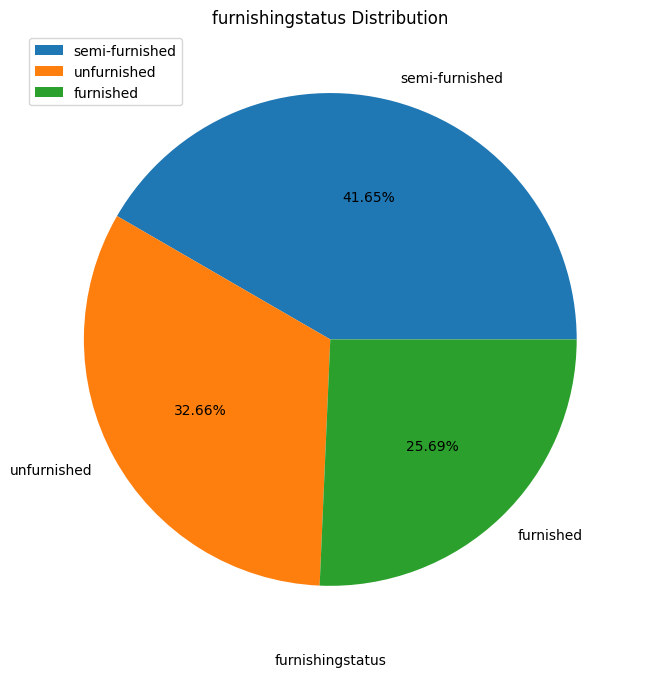

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df['furnishingstatus'].value_counts(),
        explode=[0,0,0],
        labels=df['furnishingstatus'].value_counts().index,
        shadow=False, autopct="%1.2f%%")
plt.title('furnishingstatus Distribution')
plt.xlabel('furnishingstatus')
plt.legend()
plt.show()

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


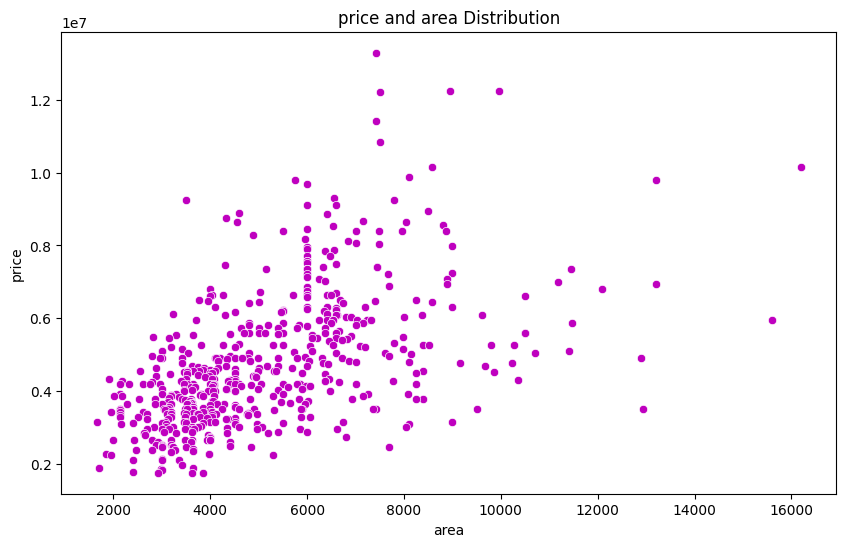

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['area'],y= df['price'], color='m')
plt.title('price and area Distribution')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

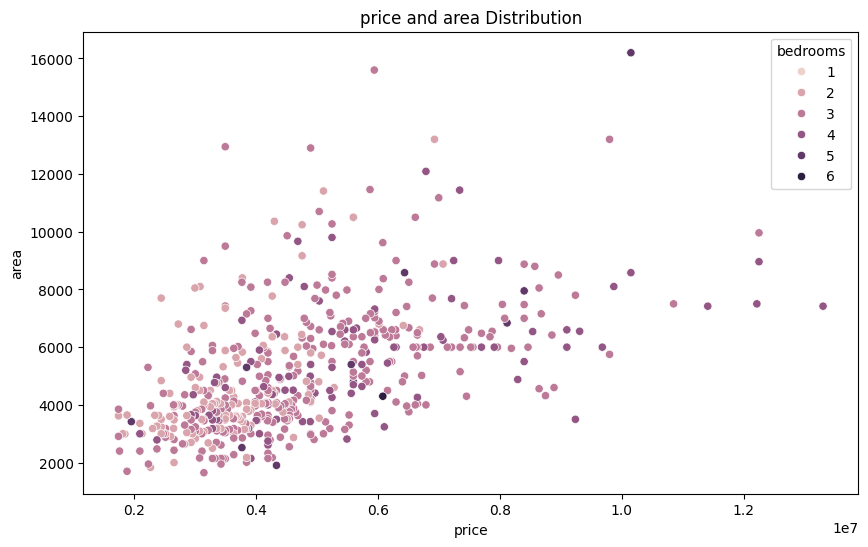

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['price'],y= df['area'], color='plum',hue=df['bedrooms'])
plt.title('price and area Distribution')
plt.xlabel('price')
plt.ylabel('area')

plt.show()

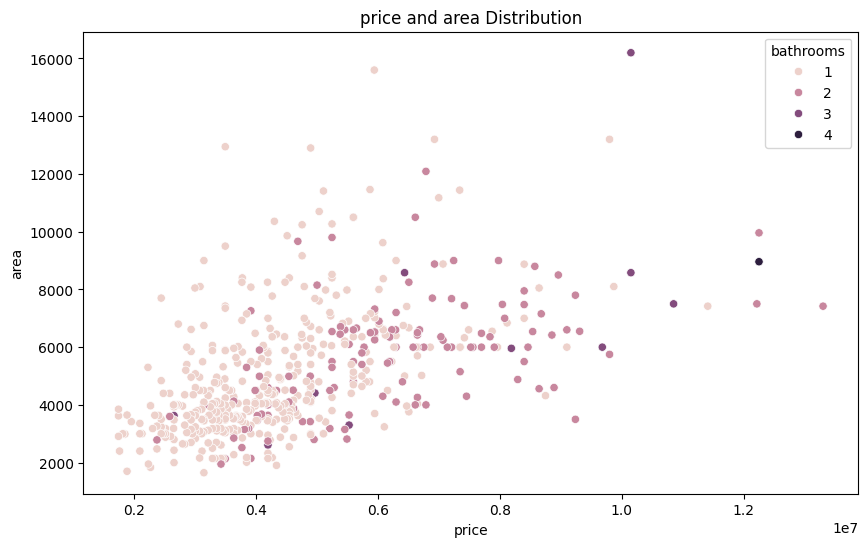

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['price'],y= df['area'], color='plum',hue=df['bathrooms'])
plt.title('price and area Distribution')
plt.xlabel('price')
plt.ylabel('area')

plt.show()

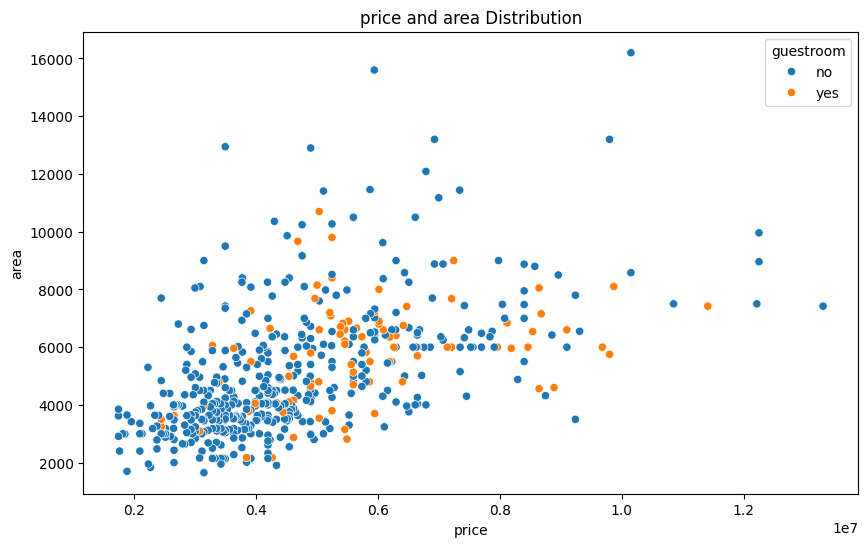

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['price'],y= df['area'], color='plum',hue=df['guestroom'])
plt.title('price and area Distribution')
plt.xlabel('price')
plt.ylabel('area')

plt.show()

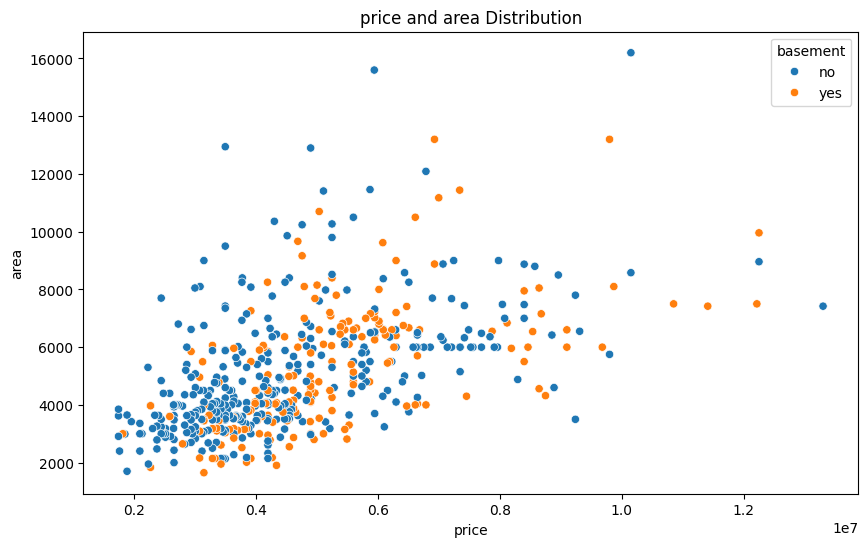

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['price'],y= df['area'], color='plum',hue=df['basement'])
plt.title('price and area Distribution')
plt.xlabel('price')
plt.ylabel('area')

plt.show()

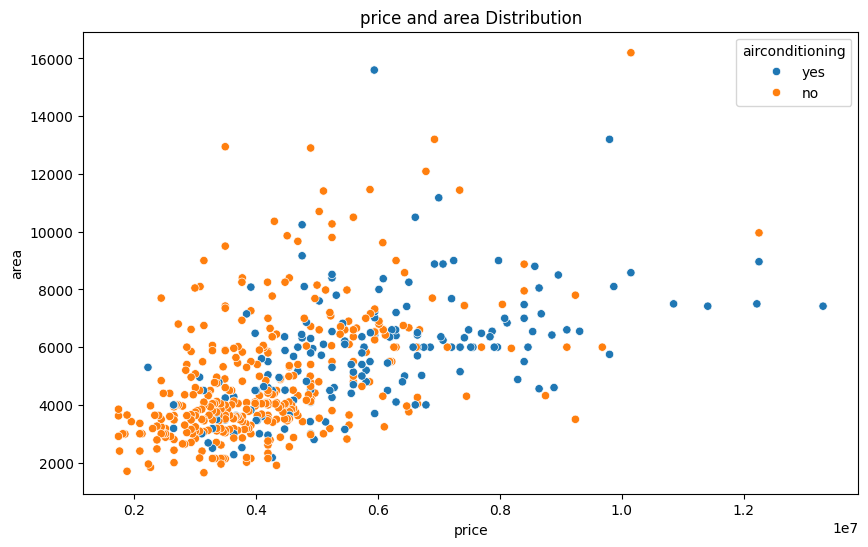

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['price'],y= df['area'], color='plum',hue=df['airconditioning'])
plt.title('price and area Distribution')
plt.xlabel('price')
plt.ylabel('area')

plt.show()

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


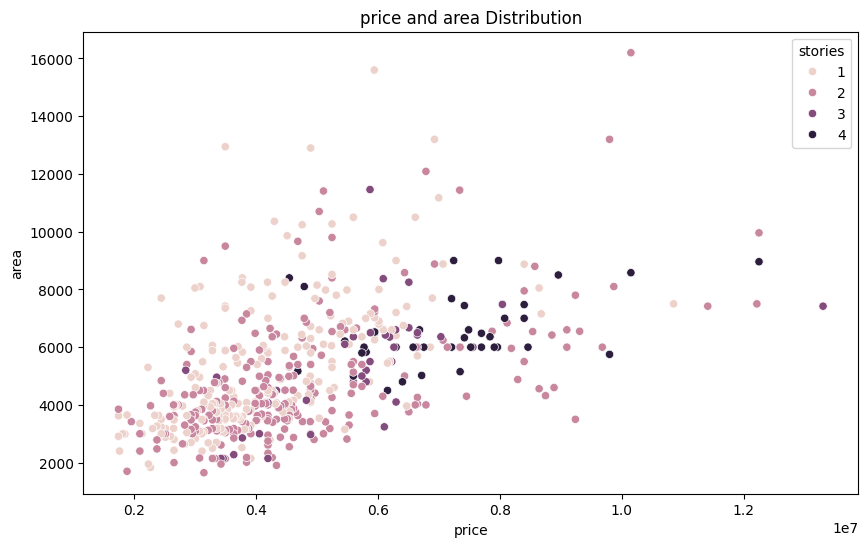

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['price'],y= df['area'], color='plum',hue=df['stories'])
plt.title('price and area Distribution')
plt.xlabel('price')
plt.ylabel('area')

plt.show()

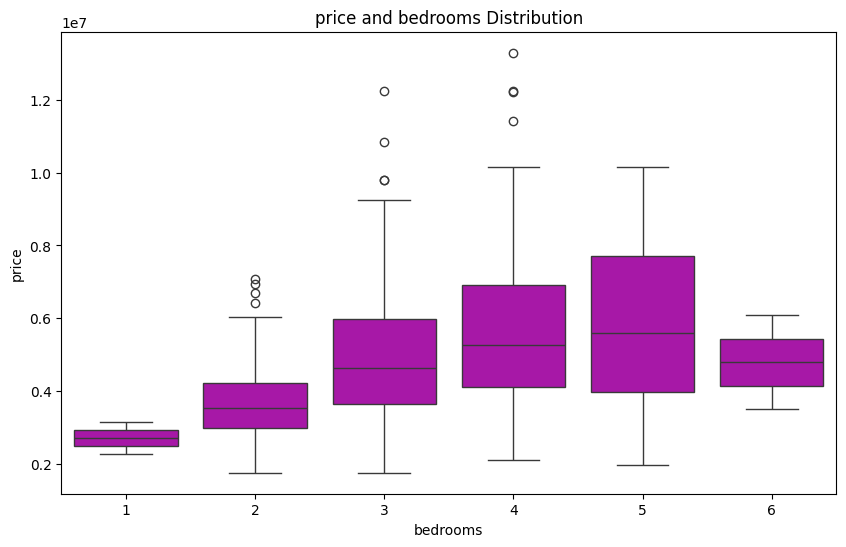

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['bedrooms'],y= df['price'], color='m')
plt.title('price and bedrooms Distribution')
plt.xlabel('bedrooms')
plt.ylabel('price')

plt.show()

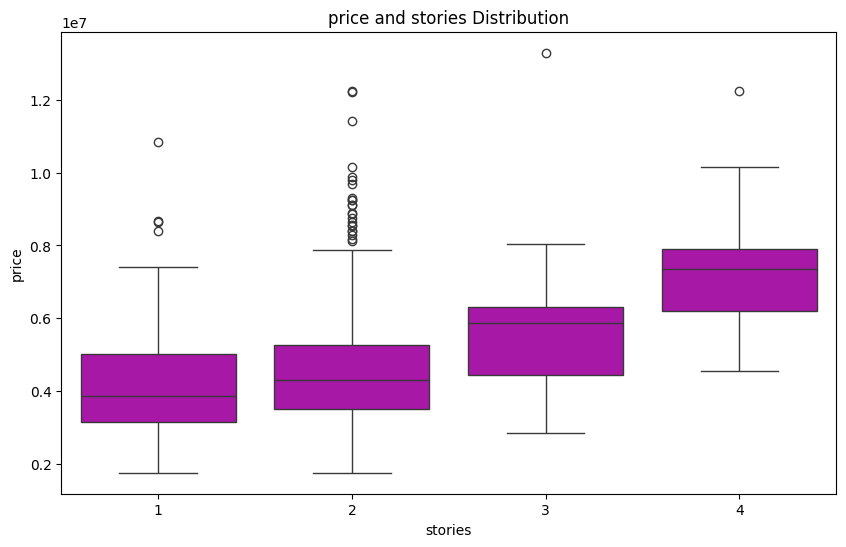

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['stories'],y= df['price'], color='m')
plt.title('price and stories Distribution')
plt.xlabel('stories')
plt.ylabel('price')

plt.show()

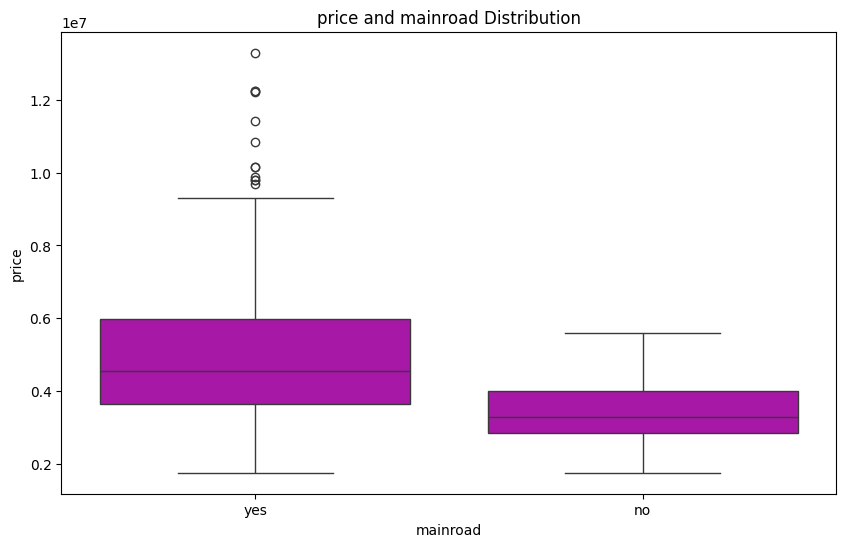

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['mainroad'],y= df['price'], color='m')
plt.title('price and mainroad Distribution')
plt.xlabel('mainroad')
plt.ylabel('price')

plt.show()

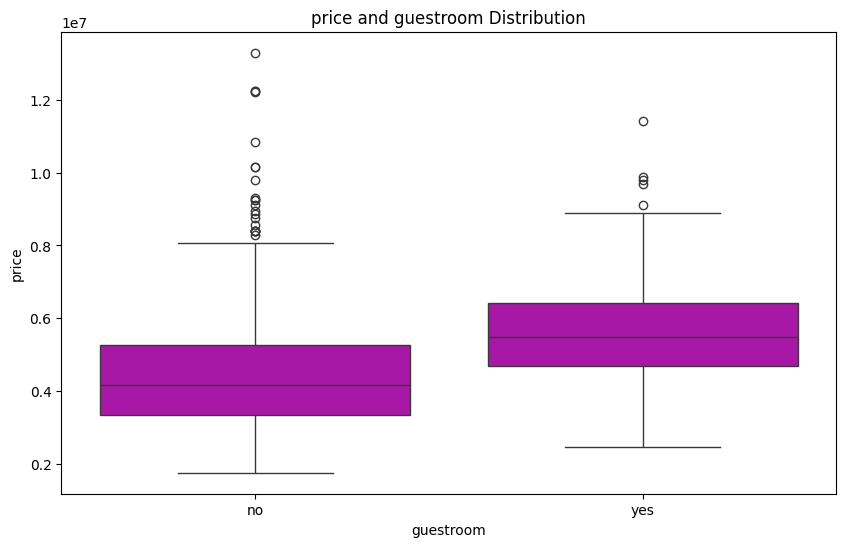

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['guestroom'],y= df['price'], color='m')
plt.title('price and guestroom Distribution')
plt.xlabel('guestroom')
plt.ylabel('price')

plt.show()

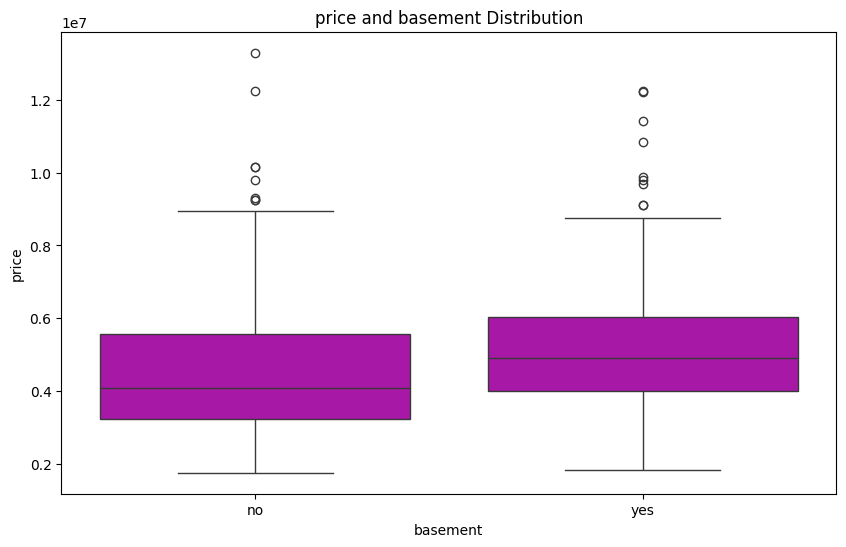

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['basement'],y= df['price'], color='m')
plt.title('price and basement Distribution')
plt.xlabel('basement')
plt.ylabel('price')

plt.show()

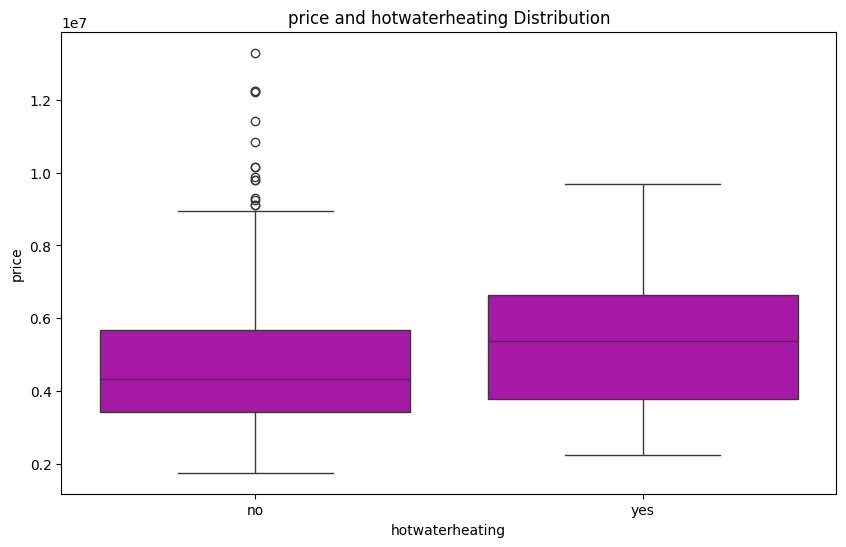

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['hotwaterheating'],y= df['price'], color='m')
plt.title('price and hotwaterheating Distribution')
plt.xlabel('hotwaterheating')
plt.ylabel('price')

plt.show()

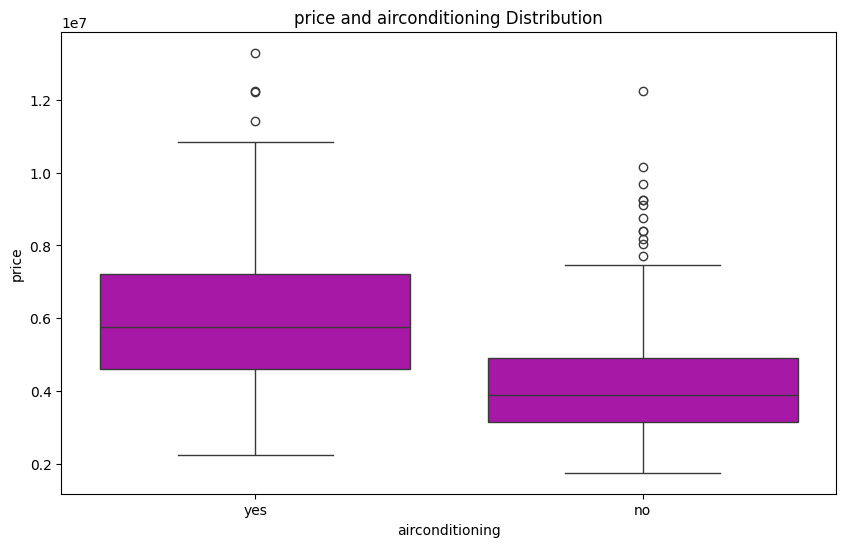

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['airconditioning'],y= df['price'], color='m')
plt.title('price and airconditioning Distribution')
plt.xlabel('airconditioning')
plt.ylabel('price')

plt.show()

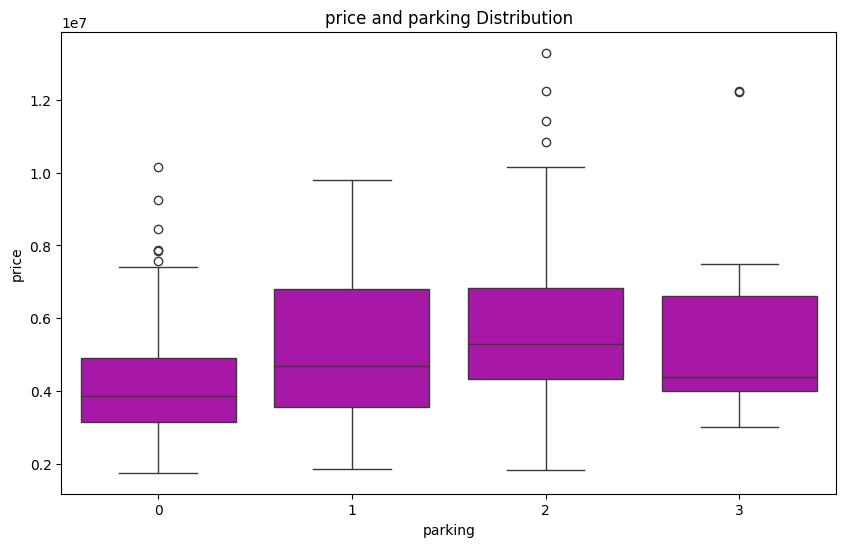

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['parking'],y= df['price'], color='m')
plt.title('price and parking Distribution')
plt.xlabel('parking')
plt.ylabel('price')

plt.show()

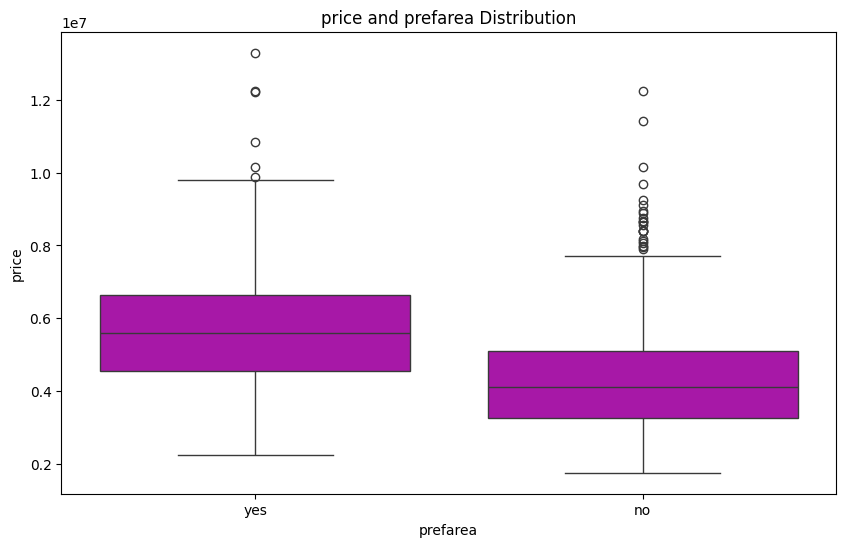

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['prefarea'],y= df['price'], color='m')
plt.title('price and prefarea Distribution')
plt.xlabel('prefarea')
plt.ylabel('price')

plt.show()

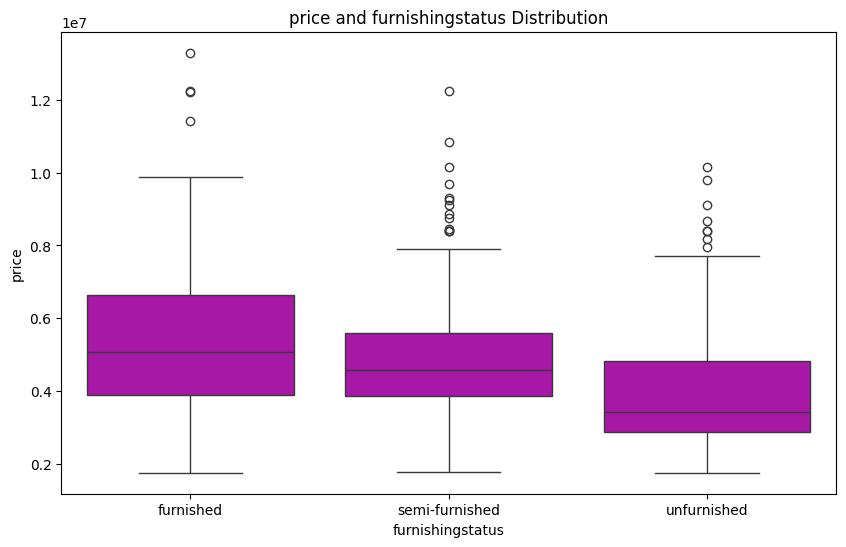

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['furnishingstatus'],y= df['price'], color='m')
plt.title('price and furnishingstatus Distribution')
plt.xlabel('furnishingstatus')
plt.ylabel('price')

plt.show()

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


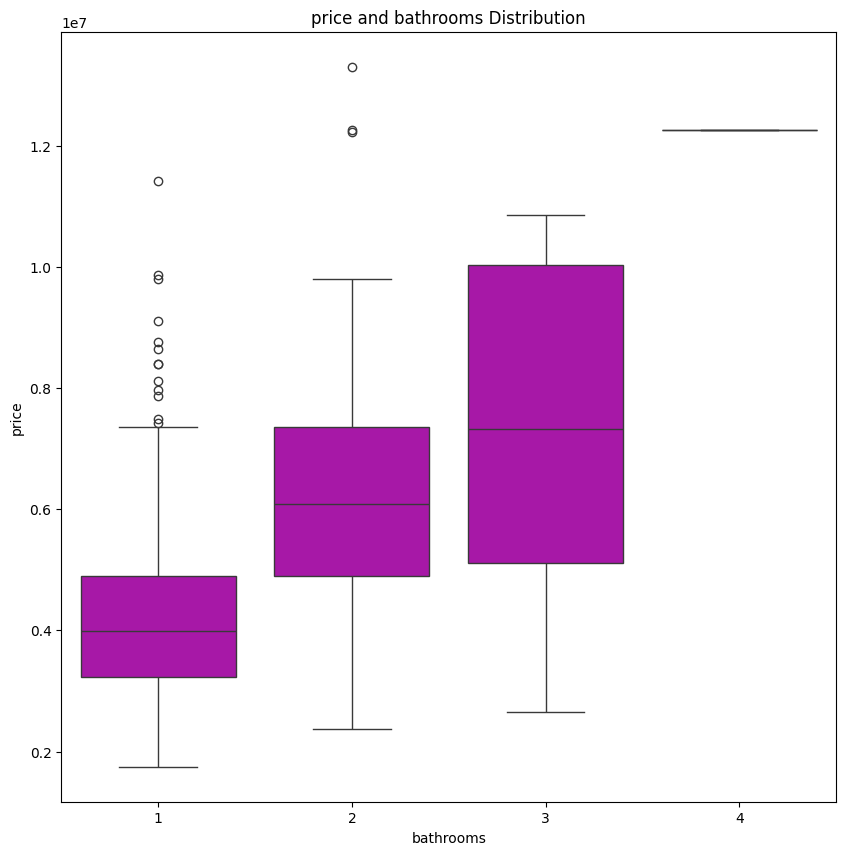

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x= df['bathrooms'],y= df['price'], color='m')
plt.title('price and bathrooms Distribution')
plt.xlabel('bathrooms')
plt.ylabel('price')

plt.show()

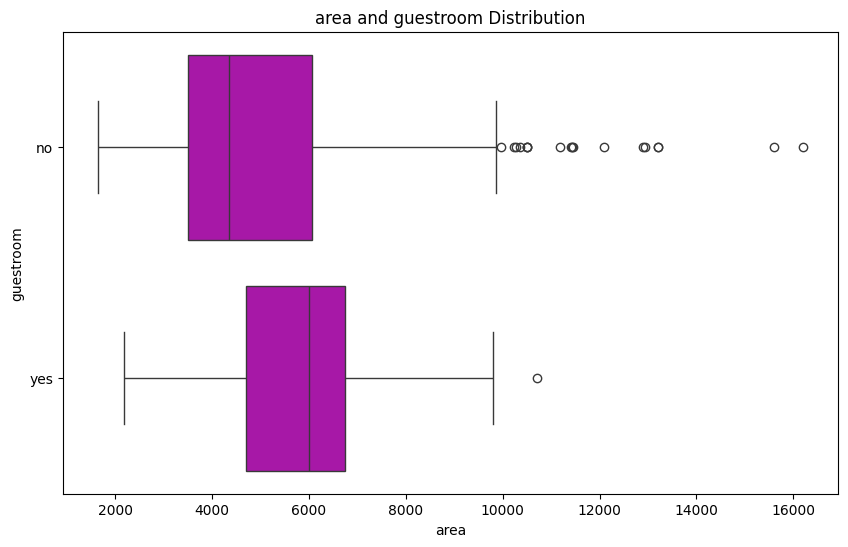

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['area'],y= df['guestroom'], color='m')
plt.title('area and guestroom Distribution')
plt.xlabel('area')
plt.ylabel('guestroom')

plt.show()

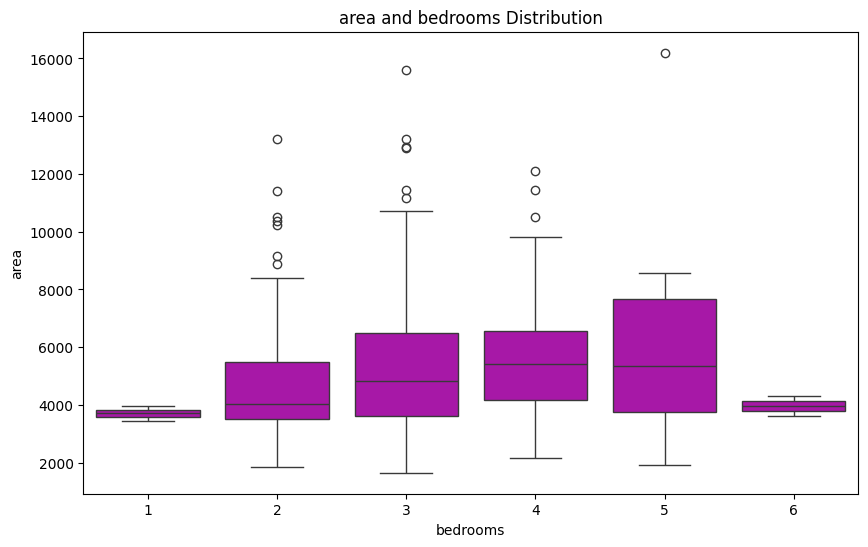

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['bedrooms'],y= df['area'], color='m')
plt.title('area and bedrooms Distribution')
plt.xlabel('bedrooms')
plt.ylabel('area')

plt.show()

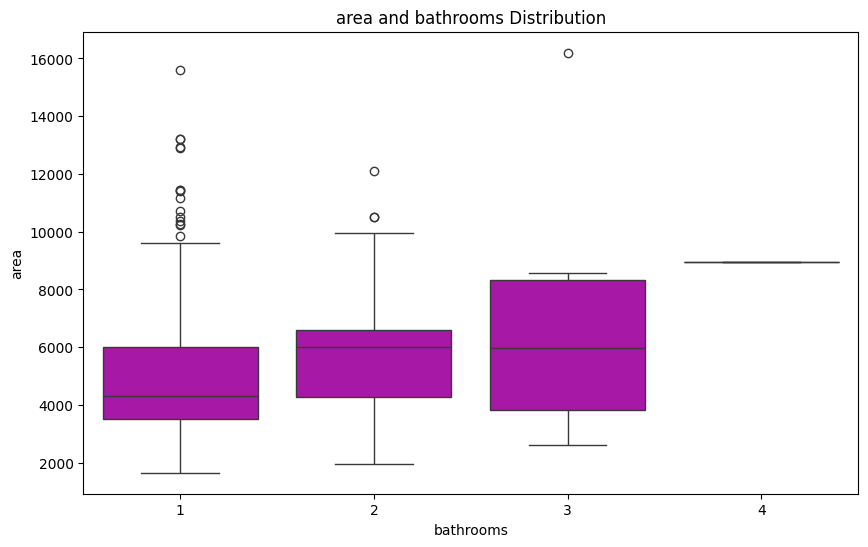

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['bathrooms'],y= df['area'], color='m')
plt.title('area and bathrooms Distribution')
plt.xlabel('bathrooms')
plt.ylabel('area')

plt.show()

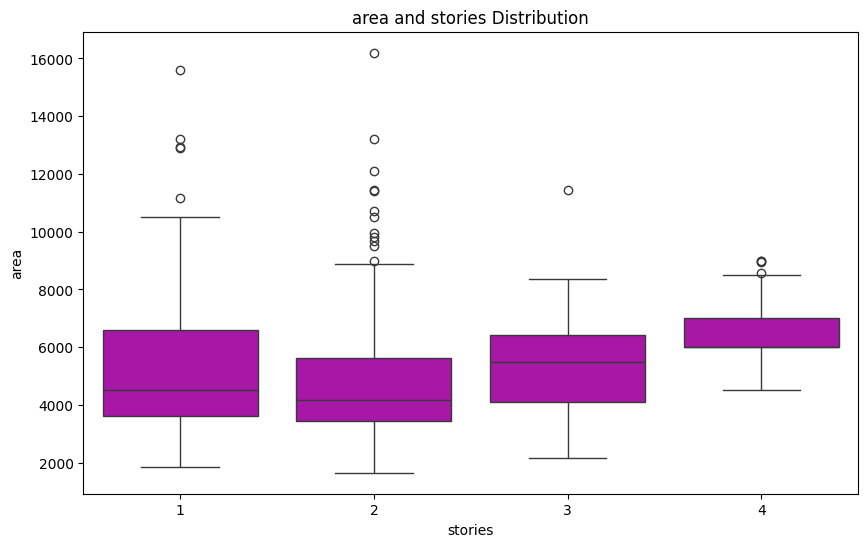

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['stories'],y= df['area'], color='m')
plt.title('area and stories Distribution')
plt.xlabel('stories')
plt.ylabel('area')

plt.show()

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
x=df.drop(columns='price')

In [ ]:
y=df['price']

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
encoder = LabelEncoder()
x['mainroad'] = encoder.fit_transform(x['mainroad'])
x['guestroom'] = encoder.fit_transform(x['guestroom'])
x['basement'] = encoder.fit_transform(x['basement'])
x['hotwaterheating'] = encoder.fit_transform(x['hotwaterheating'])
x['airconditioning'] = encoder.fit_transform(x['airconditioning'])
x['prefarea'] = encoder.fit_transform(x['prefarea'])
x['furnishingstatus'] = encoder.fit_transform(x['furnishingstatus'])

In [ ]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_test.shape

(109, 12)

In [ ]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,1,0,0,0,1,1,0,0
93,7200,3,2,1,1,0,1,0,1,3,0,1
335,3816,2,1,1,1,0,1,0,1,2,0,0
412,2610,3,1,2,1,0,1,0,0,0,1,2
471,3750,3,1,2,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,0,2
106,5450,4,2,1,1,0,1,0,1,0,1,1
270,4500,3,2,3,1,0,0,1,0,1,0,0
435,4040,2,1,1,1,0,0,0,0,0,0,2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([5203691.70963178, 7257004.02115475, 3062828.59668171,
       4559591.65374424, 3332932.30559782, 3563080.67918997,
       5645466.31219972, 6413979.66873635, 2755831.54819   ,
       2668938.66075228, 9570600.29915353, 2827431.50860062,
       3195686.2583409 , 3352263.99438471, 3713879.49996131,
       5301088.24435749, 2987920.2666968 , 4810799.8212371 ,
       4383031.70489929, 3525092.18938646, 5796259.50068013,
       5840000.70299301, 2760214.608641  , 4762590.14920608,
       5204755.73895206, 7515542.71619025, 3254681.68956382,
       5236164.45964444, 8178523.16820284, 3434166.15675649,
       6443921.58767581, 3346004.77919184, 6742324.74004133,
       4154936.84088665, 3589152.47491253, 5788125.92515322,
       4768370.18154076, 4391684.04193171, 3217657.04549935,
       4638196.61928878, 4522160.27786714, 3541284.06127245,
       7238136.1194117 , 4021515.68926614, 3701978.76822757,
       4298879.55563098, 6705004.0206061 , 3993466.52296896,
       3798185.05328059,

In [ ]:
print(mean_squared_error(y_test, y_pred))

1771751116594.0352


In [ ]:
print(mean_absolute_error(y_test, y_pred))

979679.6912959901


In [ ]:
sgd = SGDRegressor()

sgd.fit(x_train, y_train)

SGDRegressor()

In [ ]:
y_pred = sgd.predict(x_test)

In [ ]:
print(mean_absolute_error(y_test, y_pred))

2.129845545593214e+16


In [ ]:
print(mean_squared_error(y_test, y_pred))

5.243430487342517e+32


In [ ]:
lasso = Lasso()

lasso.fit(x_train, y_train)

Lasso()

In [ ]:
y_pred = lasso.predict(x_test)

In [ ]:
print(mean_absolute_error(y_test, y_pred))

979680.730778263


In [ ]:
ridge = Ridge()

ridge.fit(x_train, y_train)

Ridge()

In [ ]:
y_pred = ridge.predict(x_test)

In [ ]:
print(mean_absolute_error(y_test, y_pred))

980105.6394817502
